# DS-GA 3001.009 Modeling Time Series Data
# Week 1 Time Series Basics

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, **kwargs)
    return fig

## Part I: Autocorrelation Function

In [9]:
def acf_impl(x, nlags):
    """
    Your implementation for the Autocorrelation Function.
    Your implementation will be checked against statsmodels.tsa.stattools.acf.
    @param x: a 1-d numpy array
    @param nlags: an integer
    @return a 1-d numpy array with (nlags+1) elements. 
    The first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    return np.zeros(nlags+1)

### White Noise 

$$w_t \sim N(0, \sigma^2)$$

- Set $\sigma$ = 1, sample n = 500 points from the process above
- Plot the white noise
- Plot the sample ACF with lag = 20.
- Calculate the analytical ACF and compare it with the sample ACF.
- What trend/observation you can find in the ACF plot?
- Change n to 50, compare the new ACF plot (n=50) to the old ACF plot (n=500). What causes the difference?

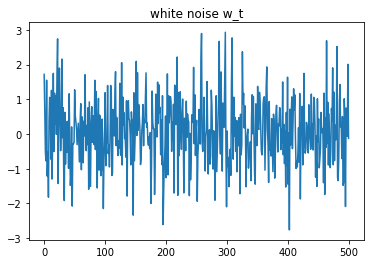

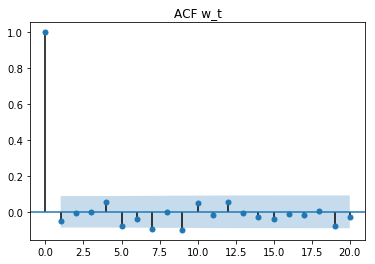

In [10]:
# Question 1.20
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n)

# plot white noise
plt.plot(w_t)
plt.title("white noise w_t")
plt.show()

# calculate acf
acf_val = acf(x=w_t, nlags=lag)
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

### Moving Average 

$$v_t = \frac{1}{3}(w_{t}, w_{t+1}, w_{t+2})$$

- Sample n+2 white noise from N(0,1)
- Add code to compute the moving average $v_t$.
- Plot both $w_t$ and $v_t$ and compare the two time series.
- Plot the sample ACF of $v_t$ and compare it with the analytical ACF.


/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:475: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


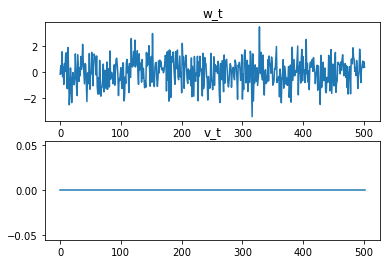

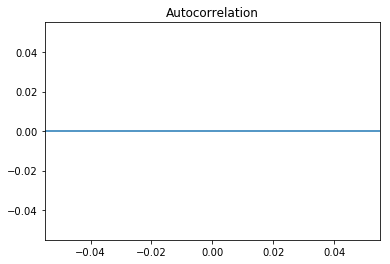

In [11]:
# Question 1.21
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+2)
# create moving average
#TODO: replace the template code with your code here. This part will be graded.
v_t = np.zeros(len(w_t))  

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")

# plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# calculate acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag)
plt.show()

### Signal in Noise 

$$v_t = 2 cos(\frac{2\pi t}{50} + 0.6\pi) + w_t$$

- Sample n white noise from $N(0,1)$
- Add code to compute $v_t$.
- Plot both $w_t$ and $v_t$. Compare the two plots.
- Plot the sample ACF of $v_t$. What's the pattern? What causes the observed pattern?

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:475: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


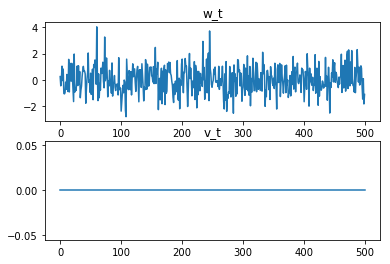

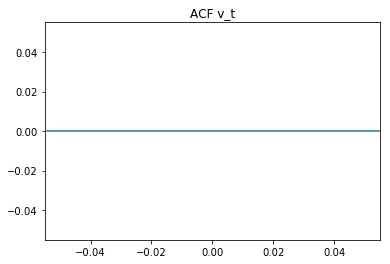

In [12]:
# Question 1.23
n = 500
mean = 0
std = 1 
lag = 100

# create white noise
w_t = np.random.normal(mean, std, size=n)
# create signal w. noise
#TODO: replace the template code with your code here. This part will be graded.
v_t = np.zeros(len(w_t))  

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.title("w_t")
# plot signal with noise
plt.subplot(212)
plt.plot(v_t)
plt.title("v_t")

# plot acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag, title="ACF v_t")
plt.show()

## Part II: Cross-correlation Function

### Synthetic Data: signal with noise

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t, w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot the both samples to verify the lag.
- Plot the sample ACF for both samples.
- Plot the sample CCF. What information can you conclude from the CCF plot?

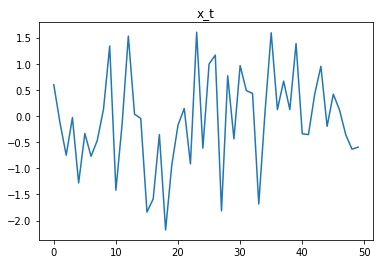

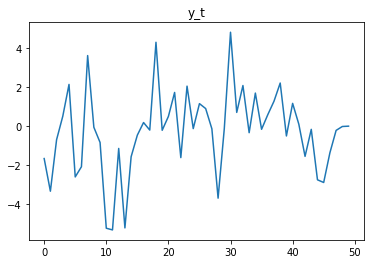

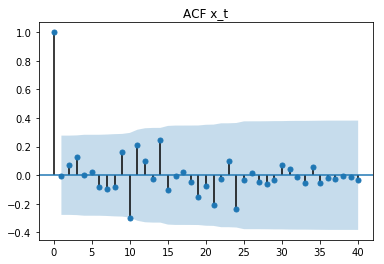

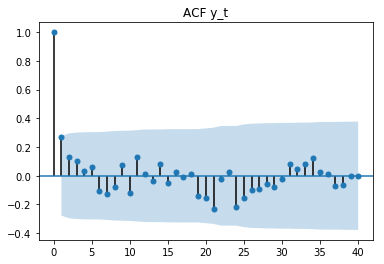

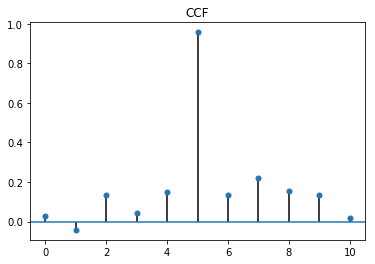

In [20]:
# Cross-correlation synthetic Example
n = 50
mean = 0
std = 1 
lag=40
true_h = 5

x_t = np.random.normal(mean, std, size=n+5)
#TODO: replace the template code with your code here. This part will be graded.
y_t = np.zeros(n)
x_t = x_t[:n]

# plot the original data
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# plot acf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

# plot ccf
ccf_val = ccf(y_t, x_t)
plot_ccf(x_t, y_t, title="CCF", lags=10)
plt.show()


### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot.
- In this example, our procedure is actually flawed. Unlike the previous example, we can not tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

In [14]:
soi = np.array(pd.read_csv("../../data/soi.csv")["x"])
rec = np.array(pd.read_csv("../../data/rec.csv")["x"])

#TODO: replace the template code with your code here. This part will be graded.
# plot data
# plot acf
# plot ccf


### Please turn in the code before 02/01/2018 6:45 pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. 